In [1]:
past_days = 1
future_days = 1
n_lags = int(96*past_days)
horizon = int(96*future_days)

## Loading the data

In [2]:
import pandas as pd

In [3]:
utility_data=pd.read_csv('weatherkit_plus_load.csv')

In [4]:
utility_data.event_timestamp = utility_data.event_timestamp.apply(pd.to_datetime)

In [5]:
utility_data.head()

,event_timestamp,weatherkit_observed_temperature_C,weatherkit_observed_humidity_pc,weatherkit_observed_air_pressure_kPa,weatherkit_observed_cloud_cover_pc,weatherkit_observed_wind_direction_deg,weatherkit_observed_wind_speed_km_h,weatherkit_forecast_temp_C,weatherkit_forecast_humidity_pc,weatherkit_forecast_air_pressure_kPa,weatherkit_forecast_cloud_cover_pc,weatherkit_forecast_wind_direction_deg,weatherkit_forecast_wind_speed_km_h,load_MW
0,2023-02-11 00:30:00+05:30,22.21,70.0,101.357,0.0,359.0,7.19,21.99,72.0,101.369,0.0,1.0,7.06,256.024088
1,2023-02-11 00:45:00+05:30,22.25,69.0,101.354,0.0,2.0,7.25,21.99,72.0,101.369,0.0,1.0,7.06,251.899132
2,2023-02-11 01:00:00+05:30,22.10,70.0,101.344,0.0,4.0,7.21,21.99,72.0,101.369,0.0,1.0,7.06,248.695780
3,2023-02-11 01:15:00+05:30,21.95,70.0,101.333,0.0,6.0,7.15,21.99,72.0,101.369,0.0,1.0,7.06,245.879308
4,2023-02-11 01:30:00+05:30,21.80,70.0,101.322,0.0,8.0,7.09,21.35,73.0,101.334,0.0,6.0,7.37,243.583376


In [6]:
utility_data.event_timestamp.max()

Timestamp('2023-07-10 17:00:00+0530', tz='pytz.FixedOffset(330)')

## Feature Extraction

In [7]:
utility_data['ts_month_of_year'] = utility_data.event_timestamp.apply(lambda x : x.month)

In [8]:
utility_data['ts_day_of_month'] = utility_data.event_timestamp.apply(lambda x : x.day)

In [9]:
utility_data['ts_day_of_week'] = utility_data.event_timestamp.apply(lambda x : x.dayofweek)

In [10]:
utility_data['ts_hour_of_day'] = utility_data.event_timestamp.apply(lambda x : x.hour)

In [11]:
utility_data['ts_minute_of_hour'] = utility_data.event_timestamp.apply(lambda x : x.minute)

In [12]:
utility_data.head()

,event_timestamp,weatherkit_observed_temperature_C,weatherkit_observed_humidity_pc,weatherkit_observed_air_pressure_kPa,weatherkit_observed_cloud_cover_pc,weatherkit_observed_wind_direction_deg,weatherkit_observed_wind_speed_km_h,weatherkit_forecast_temp_C,weatherkit_forecast_humidity_pc,weatherkit_forecast_air_pressure_kPa,weatherkit_forecast_cloud_cover_pc,weatherkit_forecast_wind_direction_deg,weatherkit_forecast_wind_speed_km_h,load_MW,ts_month_of_year,ts_day_of_month,ts_day_of_week,ts_hour_of_day,ts_minute_of_hour
0,2023-02-11 00:30:00+05:30,22.21,70.0,101.357,0.0,359.0,7.19,21.99,72.0,101.369,0.0,1.0,7.06,256.024088,2,11,5,0,30
1,2023-02-11 00:45:00+05:30,22.25,69.0,101.354,0.0,2.0,7.25,21.99,72.0,101.369,0.0,1.0,7.06,251.899132,2,11,5,0,45
2,2023-02-11 01:00:00+05:30,22.10,70.0,101.344,0.0,4.0,7.21,21.99,72.0,101.369,0.0,1.0,7.06,248.695780,2,11,5,1,0
3,2023-02-11 01:15:00+05:30,21.95,70.0,101.333,0.0,6.0,7.15,21.99,72.0,101.369,0.0,1.0,7.06,245.879308,2,11,5,1,15
4,2023-02-11 01:30:00+05:30,21.80,70.0,101.322,0.0,8.0,7.09,21.35,73.0,101.334,0.0,6.0,7.37,243.583376,2,11,5,1,30


In [13]:
target_var = 'load_MW'

In [14]:
predictor_variables = [col for col in utility_data.columns if col not in ['event_timestamp',target_var]]
predictor_variables

['weatherkit_observed_temperature_C',
 'weatherkit_observed_humidity_pc',
 'weatherkit_observed_air_pressure_kPa',
 'weatherkit_observed_cloud_cover_pc',
 'weatherkit_observed_wind_direction_deg',
 'weatherkit_observed_wind_speed_km_h',
 'weatherkit_forecast_temp_C',
 'weatherkit_forecast_humidity_pc',
 'weatherkit_forecast_air_pressure_kPa',
 'weatherkit_forecast_cloud_cover_pc',
 'weatherkit_forecast_wind_direction_deg',
 'weatherkit_forecast_wind_speed_km_h',
 'ts_month_of_year',
 'ts_day_of_month',
 'ts_day_of_week',
 'ts_hour_of_day',
 'ts_minute_of_hour']

In [15]:
observed_vars = [col for col in predictor_variables if 'observed' in col]
observed_vars

['weatherkit_observed_temperature_C',
 'weatherkit_observed_humidity_pc',
 'weatherkit_observed_air_pressure_kPa',
 'weatherkit_observed_cloud_cover_pc',
 'weatherkit_observed_wind_direction_deg',
 'weatherkit_observed_wind_speed_km_h']

In [16]:
forecast_vars = [col for col in predictor_variables if 'forecast' in col] # or 'ts_' in col)]
forecast_vars

['weatherkit_forecast_temp_C',
 'weatherkit_forecast_humidity_pc',
 'weatherkit_forecast_air_pressure_kPa',
 'weatherkit_forecast_cloud_cover_pc',
 'weatherkit_forecast_wind_direction_deg',
 'weatherkit_forecast_wind_speed_km_h']

In [17]:
ts_vars = [col for col in predictor_variables if 'ts_' in col]
ts_vars.append('event_timestamp')
ts_vars

['ts_month_of_year',
 'ts_day_of_month',
 'ts_day_of_week',
 'ts_hour_of_day',
 'ts_minute_of_hour',
 'event_timestamp']

## EDA

In [18]:
import matplotlib.pyplot as plt
import numpy as np

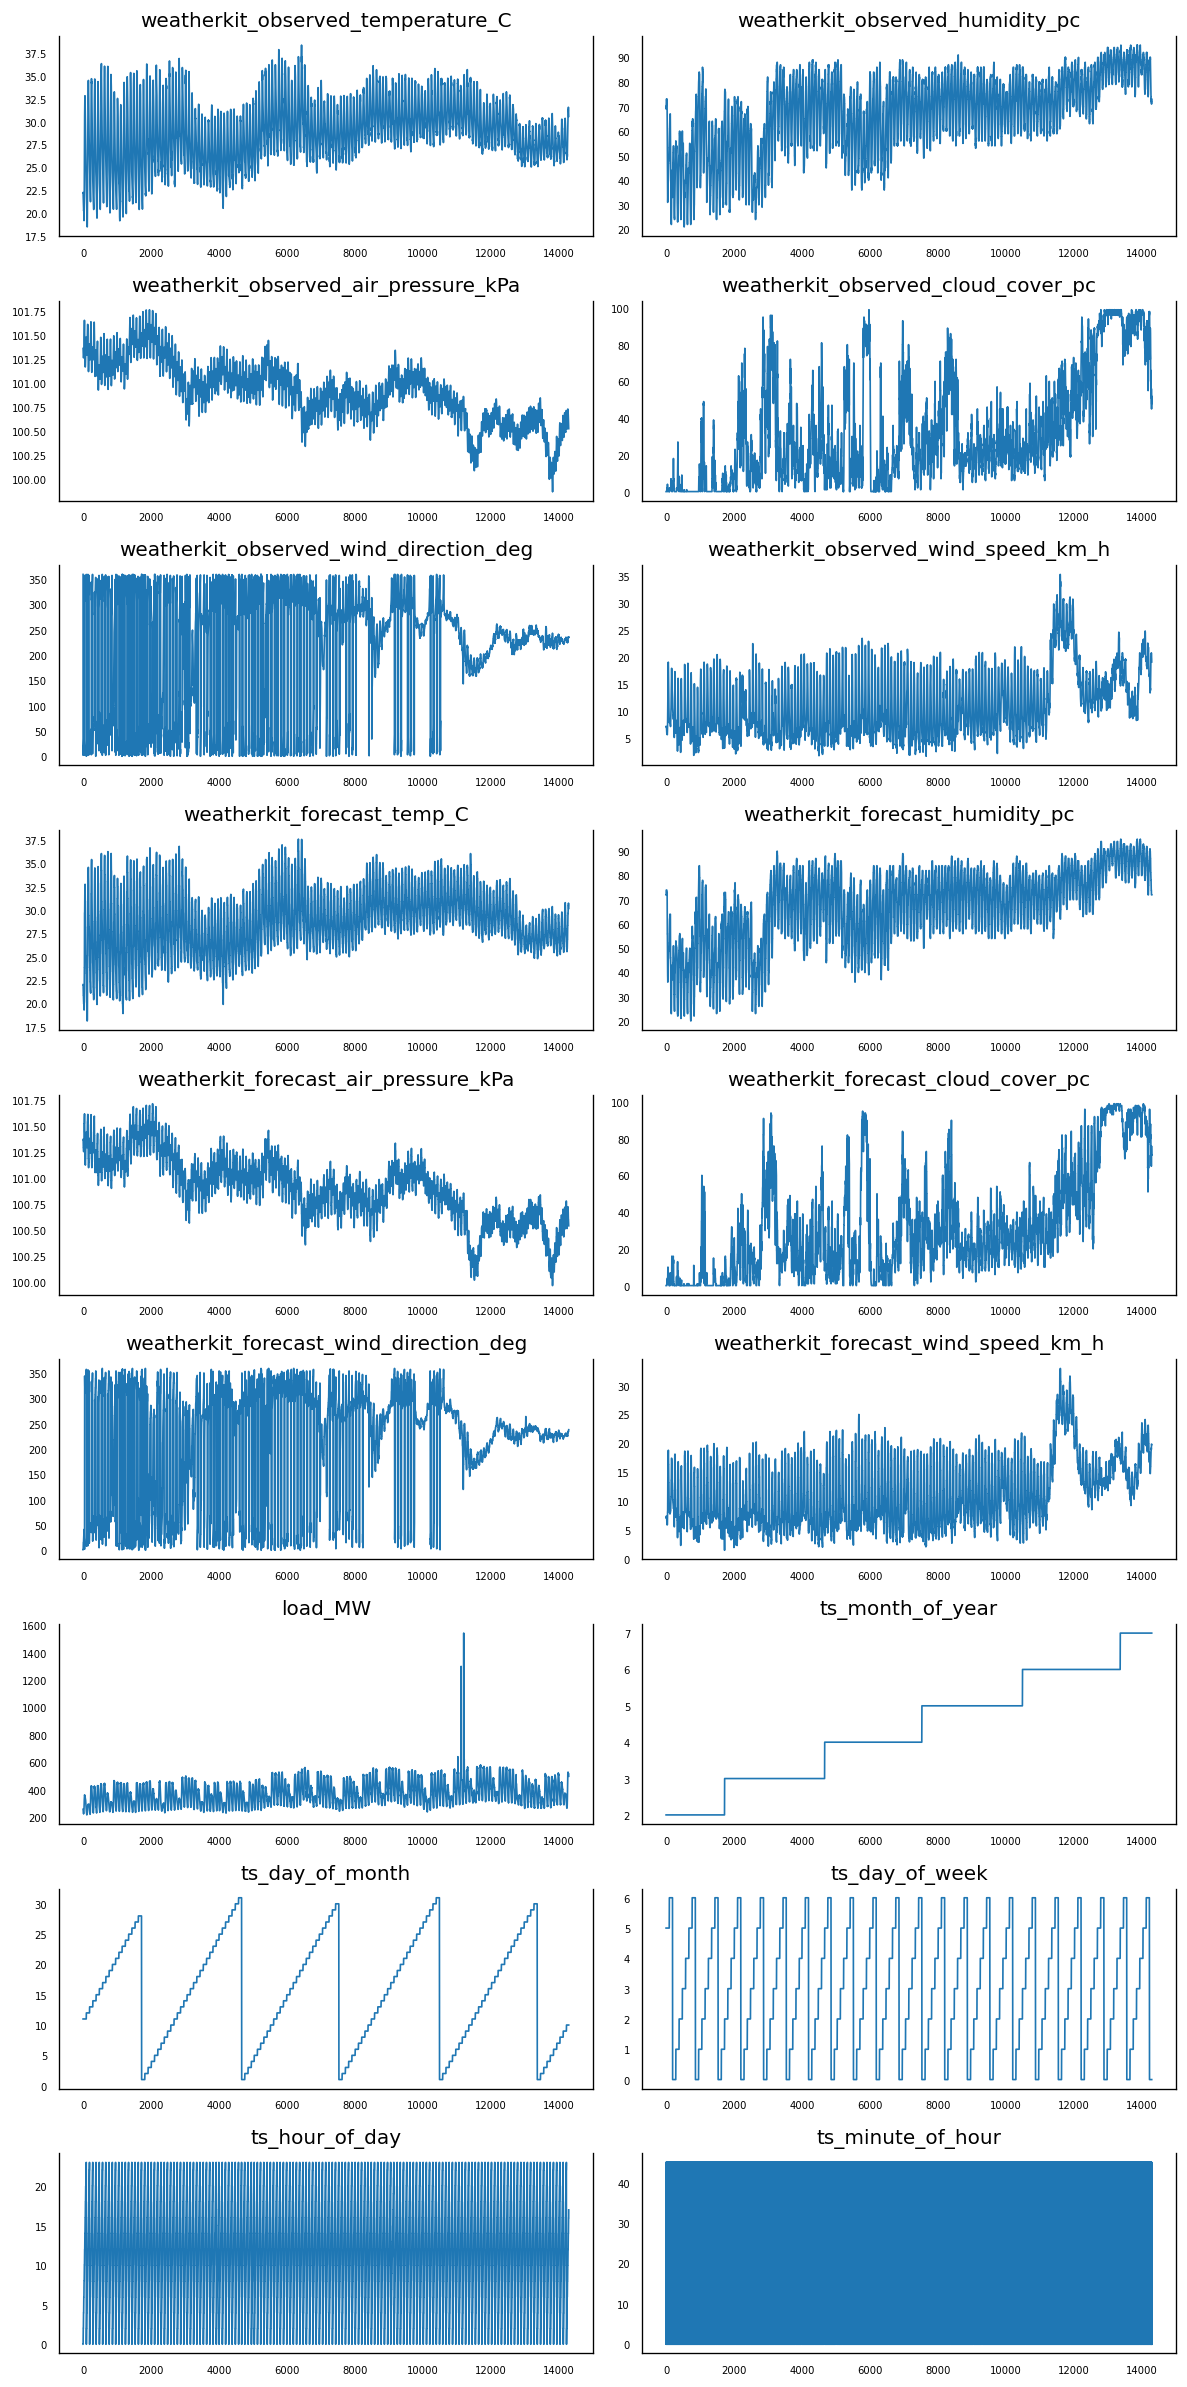

In [19]:
import matplotlib.pyplot as plt
df = utility_data[utility_data.columns[1:]]
fig, axes = plt.subplots(nrows=9, ncols=2, dpi=120, figsize=(10,20))
for i, ax in enumerate(axes.flatten()):
    try:
        data = df[df.columns[i]]
        ax.plot(data, linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=6)
    except:
        pass

plt.tight_layout()

In [20]:
utility_data.columns

Index(['event_timestamp', 'weatherkit_observed_temperature_C',
       'weatherkit_observed_humidity_pc',
       'weatherkit_observed_air_pressure_kPa',
       'weatherkit_observed_cloud_cover_pc',
       'weatherkit_observed_wind_direction_deg',
       'weatherkit_observed_wind_speed_km_h', 'weatherkit_forecast_temp_C',
       'weatherkit_forecast_humidity_pc',
       'weatherkit_forecast_air_pressure_kPa',
       'weatherkit_forecast_cloud_cover_pc',
       'weatherkit_forecast_wind_direction_deg',
       'weatherkit_forecast_wind_speed_km_h', 'load_MW', 'ts_month_of_year',
       'ts_day_of_month', 'ts_day_of_week', 'ts_hour_of_day',
       'ts_minute_of_hour'],
      dtype='object')

In [21]:
observed_vars

['weatherkit_observed_temperature_C',
 'weatherkit_observed_humidity_pc',
 'weatherkit_observed_air_pressure_kPa',
 'weatherkit_observed_cloud_cover_pc',
 'weatherkit_observed_wind_direction_deg',
 'weatherkit_observed_wind_speed_km_h']

In [22]:
forecast_vars

['weatherkit_forecast_temp_C',
 'weatherkit_forecast_humidity_pc',
 'weatherkit_forecast_air_pressure_kPa',
 'weatherkit_forecast_cloud_cover_pc',
 'weatherkit_forecast_wind_direction_deg',
 'weatherkit_forecast_wind_speed_km_h']

In [23]:
ts_vars

['ts_month_of_year',
 'ts_day_of_month',
 'ts_day_of_week',
 'ts_hour_of_day',
 'ts_minute_of_hour',
 'event_timestamp']

In [24]:
target_var

'load_MW'

## Data Preprocessing

In [25]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from sklearn.model_selection import train_test_split
from src.tde import time_delay_embedding

# create data set with lagged features using time delay embedding
utility_data_ds = []
for col in utility_data.columns:
    if col in observed_vars: 
        col_df = time_delay_embedding(utility_data[col], n_lags=n_lags, horizon=0)
        utility_data_ds.append(col_df.copy())
    elif col in forecast_vars: 
        col_df = time_delay_embedding(utility_data[col], n_lags=n_lags, horizon=horizon)
        utility_data_ds.append(col_df.copy())
    elif col in ts_vars: 
        col_df = utility_data[col]
        utility_data_ds.append(col_df.copy())
    elif col in [target_var]:
        col_df = time_delay_embedding(utility_data[col], n_lags=n_lags, horizon=horizon)
        utility_data_ds.append(col_df.copy())

# concatenating all variables
utility_data_df = pd.concat(utility_data_ds, axis=1).dropna()

In [26]:
utility_data_df.event_timestamp.min()

Timestamp('2023-02-12 00:30:00+0530', tz='pytz.FixedOffset(330)')

In [27]:
utility_data_df.event_timestamp.max()

Timestamp('2023-07-09 17:00:00+0530', tz='pytz.FixedOffset(330)')

In [28]:
target_variables = utility_data_df.columns.str.contains(f'{target_var}\(t\+')
target_variables = utility_data_df.columns[target_variables]

In [29]:
target_variables.tolist()

['load_MW(t+1)',
 'load_MW(t+2)',
 'load_MW(t+3)',
 'load_MW(t+4)',
 'load_MW(t+5)',
 'load_MW(t+6)',
 'load_MW(t+7)',
 'load_MW(t+8)',
 'load_MW(t+9)',
 'load_MW(t+10)',
 'load_MW(t+11)',
 'load_MW(t+12)',
 'load_MW(t+13)',
 'load_MW(t+14)',
 'load_MW(t+15)',
 'load_MW(t+16)',
 'load_MW(t+17)',
 'load_MW(t+18)',
 'load_MW(t+19)',
 'load_MW(t+20)',
 'load_MW(t+21)',
 'load_MW(t+22)',
 'load_MW(t+23)',
 'load_MW(t+24)',
 'load_MW(t+25)',
 'load_MW(t+26)',
 'load_MW(t+27)',
 'load_MW(t+28)',
 'load_MW(t+29)',
 'load_MW(t+30)',
 'load_MW(t+31)',
 'load_MW(t+32)',
 'load_MW(t+33)',
 'load_MW(t+34)',
 'load_MW(t+35)',
 'load_MW(t+36)',
 'load_MW(t+37)',
 'load_MW(t+38)',
 'load_MW(t+39)',
 'load_MW(t+40)',
 'load_MW(t+41)',
 'load_MW(t+42)',
 'load_MW(t+43)',
 'load_MW(t+44)',
 'load_MW(t+45)',
 'load_MW(t+46)',
 'load_MW(t+47)',
 'load_MW(t+48)',
 'load_MW(t+49)',
 'load_MW(t+50)',
 'load_MW(t+51)',
 'load_MW(t+52)',
 'load_MW(t+53)',
 'load_MW(t+54)',
 'load_MW(t+55)',
 'load_MW(t+56)',
 

In [30]:
predictor_variables = [col for col in utility_data_df.columns if col not in target_variables]
predictor_variables.remove('event_timestamp')
predictor_variables

['weatherkit_observed_temperature_C(t-95)',
 'weatherkit_observed_temperature_C(t-94)',
 'weatherkit_observed_temperature_C(t-93)',
 'weatherkit_observed_temperature_C(t-92)',
 'weatherkit_observed_temperature_C(t-91)',
 'weatherkit_observed_temperature_C(t-90)',
 'weatherkit_observed_temperature_C(t-89)',
 'weatherkit_observed_temperature_C(t-88)',
 'weatherkit_observed_temperature_C(t-87)',
 'weatherkit_observed_temperature_C(t-86)',
 'weatherkit_observed_temperature_C(t-85)',
 'weatherkit_observed_temperature_C(t-84)',
 'weatherkit_observed_temperature_C(t-83)',
 'weatherkit_observed_temperature_C(t-82)',
 'weatherkit_observed_temperature_C(t-81)',
 'weatherkit_observed_temperature_C(t-80)',
 'weatherkit_observed_temperature_C(t-79)',
 'weatherkit_observed_temperature_C(t-78)',
 'weatherkit_observed_temperature_C(t-77)',
 'weatherkit_observed_temperature_C(t-76)',
 'weatherkit_observed_temperature_C(t-75)',
 'weatherkit_observed_temperature_C(t-74)',
 'weatherkit_observed_temperatur

In [31]:
# defining target (Y) and explanatory variables (X)
X = utility_data_df[predictor_variables]
Y = utility_data_df[target_variables]

## Data Splitting, Model Training, and Inference

In [32]:
month_days = X.ts_month_of_year.astype(str)+'-'+X.ts_day_of_month.astype(str)

In [33]:
last_14_days  = np.where((X.ts_hour_of_day == 8) & (X.ts_minute_of_hour ==0))[0][-14:]
last_14_days 

array([12825, 12921, 13017, 13113, 13209, 13305, 13401, 13497, 13593,
       13689, 13785, 13880, 13975, 14070], dtype=int64)

In [53]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.multioutput import MultiOutputRegressor
from lightgbm import LGBMRegressor

predictions = []
actuals=[]

for i in range(14,0,-1):
    day = abs(14-i+1)
    print('training model for test day {}'.format(day))
    
    # train/test split
    X_tr, X_ts  = X.iloc[:last_14_days[-i]],X.iloc[last_14_days[-i]:last_14_days[-i]+1]
    Y_tr, Y_ts = Y.iloc[:last_14_days[-i]],Y.iloc[last_14_days[-i]:last_14_days[-i]+1]

    # fitting a lgbm model
    model = MultiOutputRegressor(LGBMRegressor(n_estimators = 100),n_jobs=-1)
    model.fit(X_tr, Y_tr)

    preds_ts = model.predict(X_ts)

    predictions.extend(preds_ts.reshape(-1).tolist())
    actuals.extend(Y_ts.values.reshape(-1).tolist())
predictions = np.array(predictions)
actuals = np.array(actuals)

training model for test day 1
training model for test day 2
training model for test day 3
training model for test day 4
training model for test day 5
training model for test day 6


C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


training model for test day 7


C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


training model for test day 8


C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


training model for test day 9
training model for test day 10
training model for test day 11
training model for test day 12


C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


training model for test day 13


C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


training model for test day 14


## Model Evaluation

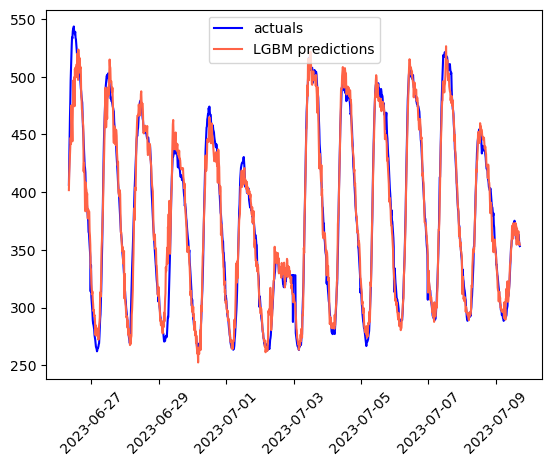

In [55]:
# n_estimators = 100
x = utility_data_df.iloc[last_14_days[0]:].event_timestamp
y1 = actuals[:x.shape[0]]
y2 = predictions[:x.shape[0]]
plt.plot(x,y1,color='b',label='actuals')
plt.plot(x,y2,color='tomato',label='LGBM predictions')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [56]:
# Model evaluation
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print('MAPE: {:.2%}'.format(mape(y1, y2)))
print('RMSE: {:.4f}'.format(np.sqrt(mse(y1,y2))))
print('MAE: {:.4f}'.format(mae(y1,y2)))

MAPE: 2.67%
RMSE: 14.5096
MAE: 9.9162


## Feature Importance Analysis

In [60]:
pd.set_option('display.max_rows', 700)

In [63]:
X.columns.shape

(1829,)

In [76]:
all_imp = np.array([model.estimators_[i].feature_importances_ for i in range(len(model.estimators_))])

feature_imp = pd.DataFrame(np.concatenate((np.array(X.columns).reshape(-1,1),
                           all_imp.sum(axis=0).reshape(-1,1)),axis=1),
                           columns = ['feature','importance'])
feature_imp = feature_imp.sort_values(by='importance',ascending=False)

In [77]:
feature_imp.importance=feature_imp.importance/feature_imp.importance.sum()

In [78]:
feature_imp['cum_imp']=feature_imp.importance.cumsum()

In [79]:
feature_imp['norm_importance'] = feature_imp.importance/feature_imp.importance.max()

In [80]:
feature_imp.head(200)

,feature,importance,cum_imp,norm_importance
1826,ts_day_of_week,0.05509,0.05509,1.0
1825,ts_day_of_month,0.028406,0.083497,0.515631
1823,load_MW(t),0.023049,0.106545,0.418379
1827,ts_hour_of_day,0.015115,0.12166,0.27436
1822,load_MW(t-1),0.003788,0.125448,0.068763
1728,load_MW(t-95),0.003281,0.128729,0.059561
1821,load_MW(t-2),0.002594,0.131323,0.047082
1814,load_MW(t-9),0.0025,0.133823,0.04538
1815,load_MW(t-8),0.002493,0.136316,0.045254
1820,load_MW(t-3),0.002483,0.138799,0.045065


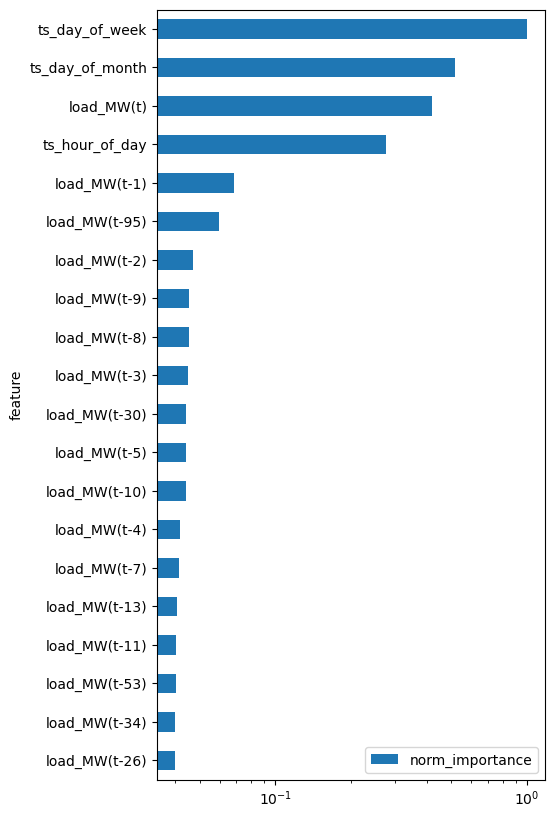

In [102]:
feature_imp[['feature','norm_importance']].head(20).plot.barh(x='feature',y='norm_importance',logx=True,figsize=(5,10))
plt.gca().invert_yaxis()


In [68]:
feature_imp.cum_imp.astype(float).describe(percentiles=[0.25,.5,.75,.8,.90,.95])

count    1829.000000
mean        0.701830
std         0.220490
min         0.055090
25%         0.541771
50%         0.739073
75%         0.892771
80%         0.918655
90%         0.965133
95%         0.984778
max         1.000000
Name: cum_imp, dtype: float64

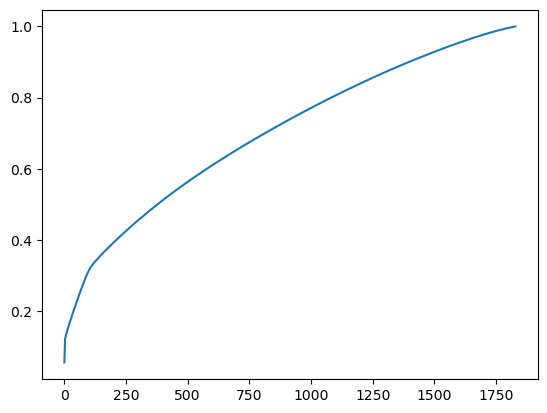

In [69]:
x = np.arange(feature_imp.shape[0])
y = feature_imp.cum_imp.astype(float)
plt.plot(x,y)
plt.show()